In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [28]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [29]:
#Use GPU in Edit Menu->NooteBook Settings

In [30]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [31]:
tf.test.is_built_with_cuda()

True

In [32]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [33]:
X_train.shape

(50000, 32, 32, 3)

In [34]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [35]:
y_train.shape

(50000, 1)

In [36]:
y_train[0]

array([6], dtype=uint8)

In [37]:
#6 is a frog

In [38]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [39]:
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(X_train[index])

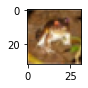

In [40]:
plot_sample(0)

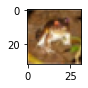

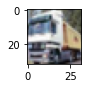

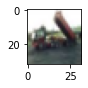

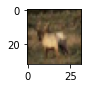

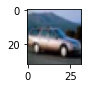

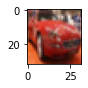

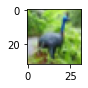

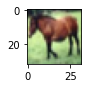

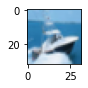

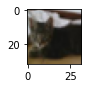

In [41]:
for i in range(10):
  plot_sample(i)


In [42]:
y_train[3]

array([4], dtype=uint8)

In [46]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [47]:
classes[y_train[3][0]]

'deer'

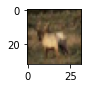

In [48]:
plot_sample(3)

In [49]:
#Scaling our image by divide 255

In [50]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [51]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [52]:
#Using One hot coding Classification

In [53]:
y_train_categorical=keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')

In [55]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [56]:
y_test_categorical=keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')

In [57]:
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [58]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [59]:
32*32*3

3072

In [61]:
model=keras.Sequential([
    #Input Layer
    keras.layers.Flatten(input_shape=(32,32,3)),
    #Hidden layer
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    #Output Layer-10 Classes
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_scaled,y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 9s 4ms/step - loss: 1.8118 - accuracy: 0.3540
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6222 - accuracy: 0.4249
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5429 - accuracy: 0.4542
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4843 - accuracy: 0.4781
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4337 - accuracy: 0.4962
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3876 - accuracy: 0.5135
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3515 - accuracy: 0.5241
Epoch 8/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3150 - accuracy: 0.5385
Epoch 9/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2818 - accuracy: 0.5503
Epoch 10/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.251

In [62]:
model.predict(X_train_scaled)

1563/1563 [==============================] - 3s 2ms/step


array([[0.33708337, 0.6857996 , 0.57436717, ..., 0.61744565, 0.00269848,
        0.02321981],
       [0.04055421, 0.9875589 , 0.9436909 , ..., 0.3068136 , 0.15530846,
        0.9997582 ],
       [0.6024336 , 0.14529225, 0.24293652, ..., 0.4999857 , 0.7373543 ,
        0.9998915 ],
       ...,
       [0.9925944 , 0.8191478 , 0.53741825, ..., 0.07470022, 0.69840574,
        0.999951  ],
       [0.80431855, 0.99999464, 0.09907175, ..., 0.00188178, 0.99850035,
        0.999032  ],
       [0.60348946, 0.95959777, 0.5772775 , ..., 0.3409792 , 0.79302824,
        0.5662918 ]], dtype=float32)

In [63]:
model.predict(X_test_scaled)

313/313 [==============================] - 1s 2ms/step


array([[8.1721747e-01, 4.5221451e-01, 6.0317796e-01, ..., 5.3132197e-04,
        2.7829775e-01, 2.3291497e-01],
       [7.2272426e-01, 9.7679728e-01, 2.0434795e-01, ..., 7.5179137e-02,
        9.9953341e-01, 9.6399719e-01],
       [9.0632981e-01, 8.5960269e-01, 3.8946763e-01, ..., 9.2654186e-01,
        9.8924971e-01, 9.4921386e-01],
       ...,
       [1.2848194e-01, 1.8906614e-02, 9.8796427e-01, ..., 7.1157062e-01,
        2.4725848e-01, 3.3071369e-01],
       [2.7456132e-01, 2.7878202e-02, 9.7985864e-01, ..., 6.9932997e-01,
        6.8493567e-02, 4.1629437e-02],
       [3.8926650e-02, 1.1947423e-02, 8.7395692e-01, ..., 9.9273032e-01,
        3.5105088e-01, 1.7353453e-01]], dtype=float32)

In [68]:
p1=model.predict(X_test_scaled)[0]

313/313 [==============================] - 1s 3ms/step


In [69]:
np.argmax(p1)

3

In [70]:
classes[3]

'cat'

In [72]:
classes[y_test[0][0]]

'cat'

In [73]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 [==============================] - 1s 2ms/step


'cat'

In [74]:
y_test[1]

array([8], dtype=uint8)

In [75]:
y_test[1][0]

8

In [76]:
classes[y_test[1][0]]

'ship'

In [77]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

313/313 [==============================] - 1s 2ms/step


'ship'

In [79]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.5713 - accuracy: 0.5559


[1.571325659751892, 0.555899977684021]

In [83]:
def get_model():
  model=keras.Sequential([
    #Input Layer
    keras.layers.Flatten(input_shape=(32,32,3)),
    #Hidden layer
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    #Output Layer-10 Classes
    keras.layers.Dense(10,activation='sigmoid')
  ])

  model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

  return model

Lets measure Training time on CPU

In [85]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
  cpu_model=get_model()
  cpu_model.fit(X_train_scaled,y_train_categorical,epochs=1)


1563/1563 [==============================] - 87s 55ms/step - loss: 1.8132 - accuracy: 0.3541
1min 27s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Lets measure Training time on GPU

In [87]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
  gpu_model=get_model()
  gpu_model.fit(X_train_scaled,y_train_categorical,epochs=1)

1563/1563 [==============================] - 6s 4ms/step - loss: 1.8105 - accuracy: 0.3572
11.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
#GPU is more faster